In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [21]:
data = pd.read_csv('data\preproc.csv', encoding = 'ISO-8859-1')
print(data.shape)

(114928, 12)


In [22]:
pd.set_option('display.max_columns', 12)
data.head(10)

,Unnamed: 0,id,Unnamed: 0.1,goal,state,country,creator,location,category,time_to_state_change,pre_launch,post_launch
0,0,663816109,0,17380.00,failed,US,200609383,"Raleigh, NC",playing cards,1,9 days 00:00:00.000000000,30 days 00:00:00.000000000
1,1,1462931821,1,24000.00,failed,US,1179655388,"Tokyo, Japan",pop,0,62 days 00:00:00.000000000,37 days 00:00:00.000000000
2,2,1724358498,2,37069.85,failed,CA,2078972315,"Vancouver, Canada",vegan,0,8 days 00:00:00.000000000,30 days 00:00:00.000000000
3,3,314918941,3,1000.00,successful,US,863236098,"Albuquerque, NM",mixed media,0,10 days 00:00:00.000000000,30 days 00:00:00.000000000
4,4,1766165140,4,1121.67,failed,GB,1226281117,"Leicester, UK",children's books,1,4 days 00:00:00.000000000,30 days 00:00:00.000000000
5,5,228675817,5,223.86,canceled,GB,585969127,"Brighton and Hove City, UK",woodworking,-1438560,0 days 00:00:00.000000000,30 days 00:00:00.000000000
6,6,1549710695,6,3085.22,successful,AU,334771300,"Melbourne, AU",art books,0,10 days 00:00:00.000000000,30 days 00:00:00.000000000
7,7,1167950746,7,1000.00,successful,US,352521893,"Tallahassee, FL",pop,3,0 days 00:00:00.000000000,23 days 00:00:00.000000000
8,8,388864071,8,7000.00,successful,US,1449706720,"Rochester, NY",video games,0,23 days 00:00:00.000000000,30 days 00:00:00.000000000
9,9,553676588,9,550.00,successful,US,1777736873,"Manchester, NH",sculpture,1,25 days 00:00:00.000000000,30 days 00:00:00.000000000


In [23]:
#removing the zeros from the datetime columns
def dates_as_str_without_zeros(data):
    df = data.copy()
    df.pre_launch.replace({r'((\d+) days 00:00:00.0*)': r'\2'}, inplace=True, regex=True)
    df.post_launch.replace({r'((\d+) days 00:00:00.0*)': r'\2'}, inplace=True, regex=True)
    
    return df

In [24]:
data = dates_as_str_without_zeros(data)

In [25]:
data['pre_launch'] = data['pre_launch'].astype(int)
data['post_launch'] = data['post_launch'].astype(int)

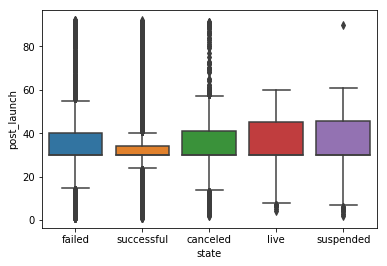

In [7]:
#sns.boxplot(x=data.state, y=data.pre_launch) #this column does not seem to be very usefull
sns.boxplot(x=data.state, y=data.post_launch) #this one seems more useful

In [26]:
#extracting the Y values
target = (data.state == 'successful').astype(int)

In [27]:
#droping the target column from the data
data.drop('state', axis=1, inplace=True)

data1: Trying percision of the model by narrowing down the locaitons -> only taking the last part in the location, which refers to the city/town or country and not the previous part

In [28]:
data1 = data.copy()
data1.location.replace({r'(.*,\s([A-Za-z]*\s*[A-Za-z]*\s*[A-Za-z]*\s*[A-Za-z.*]*$))' : r'\2'}, regex=True, inplace=True)

data 2: Trying percision of the model by changing the locations that appear less than 50 times to 'Rare'

In [9]:
data2 = data.copy()
thresh = 50
counts = data2['location'].value_counts()
to_remove = counts[counts <= thresh].index
data2['location'].replace(to_remove, 'Rare', inplace=True)

In [ ]:
#from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
#data['blurb'] = le.fit_transform(data['blurb']) 

In [10]:
data1.head()

,id,goal,country,creator,location,category,time_to_state_change,pre_launch,post_launch
0,663816109,17380.00,US,200609383,NC,playing cards,1,9,30
1,1462931821,24000.00,US,1179655388,Japan,pop,0,62,37
2,1724358498,37069.85,CA,2078972315,Canada,vegan,0,8,30
3,314918941,1000.00,US,863236098,NM,mixed media,0,10,30
4,1766165140,1121.67,GB,1226281117,UK,children's books,1,4,30


In [31]:
#data1 = pd.get_dummies(data1, columns=['category', 'location', 'country'])

In [12]:
data2 = pd.get_dummies(data2, columns=['category', 'location', 'country'])

In [28]:
#data2.shape, data1.shape

((114928, 420), (114928, 388))

In [39]:
data1 = data1[['id', 'goal','time_to_state_change', 'pre_launch', 'post_launch']]
data1 = data1.join(dfr).set_index('id')

In [40]:
#data1.reset_index(inplace=True)
data1.head()

,goal,time_to_state_change,pre_launch,post_launch,category_playing cards,category_pop,...,country_DK,country_AT,country_BE,country_HK,country_SG,country_LU
id,,,,,,,,,,,,,
663816109,17380.00,1,9,30,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0
1462931821,24000.00,0,62,37,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0
1724358498,37069.85,0,8,30,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0
314918941,1000.00,0,10,30,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0
1766165140,1121.67,1,4,30,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0


************ data2 gives slightly better results thatn data1 ************

In [18]:
x_train, x_test, y_train, y_test = train_test_split(data1, target, 
                                                    test_size=0.2, 
                                                    random_state=1919, 
                                                    stratify=target)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(91942, 386) (91942,)
(22986, 386) (22986,)


In [34]:
param = {'max_depth': [12, 14], 
         'criterion': ['gini'], 
         'class_weight': [None, 'balanced']}
dtc = DecisionTreeClassifier()
dtc_gcv = GridSearchCV(dtc, param, cv=5)

dtc_gcv.fit(x_train, y_train)

dtc_gcv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=14,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [35]:
y_pred_dtc = dtc_gcv.predict(x_test)
print(confusion_matrix(y_test, y_pred_dtc))
print(classification_report(y_test, y_pred_dtc, digits=3))
accuracy_score(y_test, y_pred_dtc)

[[9944 2530]
 [3768 6744]]
             precision    recall  f1-score   support

          0      0.725     0.797     0.759     12474
          1      0.727     0.642     0.682     10512

avg / total      0.726     0.726     0.724     22986



0.72600713477769074

In [36]:
important_feat = dtc_gcv.best_estimator_.feature_importances_.tolist()
all_feats = list(data2)
feats = list(zip(all_feats, important_feat))
clean_feats = [x for x, y in feats if y > 0]
clean_feats

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

y_pred_lda = lda.predict(x_test)
print(classification_report(y_test, y_pred_lda, digits=3))
accuracy_score(y_test, y_pred_lda)

             precision    recall  f1-score   support

          0      0.711     0.833     0.767     12474
          1      0.751     0.598     0.666     10512

avg / total      0.729     0.726     0.721     22986



/Users/Nargess/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.72557208735752199

In [32]:
#since LDA does not give the important features as it uses all the features to get results, Im masking the data with important 
#features from the tree and see if LDA produces ok results using only these features
data3 = data2[clean_feats]

In [33]:
x3_train, x3_test, y3_train, y3_test = train_test_split(data3, target, 
                                                    test_size=0.2, 
                                                    random_state=1919, 
                                                    stratify=target)
print(x3_train.shape, y3_train.shape)
print(x3_test.shape, y3_test.shape)

(91942, 27) (91942,)
(22986, 27) (22986,)


In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

lda3 = LinearDiscriminantAnalysis()
lda3.fit(x3_train, y3_train)

y_pred_lda3 = lda3.predict(x3_test)
print(classification_report(y3_test, y_pred_lda3, digits=3))
accuracy_score(y3_test, y_pred_lda3)

             precision    recall  f1-score   support

          0      0.672     0.896     0.768     12474
          1      0.795     0.480     0.599     10512

avg / total      0.728     0.706     0.690     22986



0.705646915513791

In [16]:
dtc = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
dtc.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [17]:
#visualising DT's result
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt2.dot", 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt2.dot", "-o", "dt2.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

cols = data.columns.tolist()
visualize_tree(dtc, cols)

In [26]:
param = {'n_neighbors': [2, 3, 4, 5]}
knn = KNeighborsClassifier()
knn_gcv = GridSearchCV(knn, param, cv=5)

knn_gcv.fit(x_train, y_train)
knn_gcv.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [37]:
y_pred_knn = knn_gcv.predict(x_test)
#print(classification_report(y_test, y_pred_knn, digits=3))

NameError: name 'knn_gcv' is not defined

In [59]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
#mnb.fit(x_train, y_train) #doesnt work cause its only for positive values

#y_pred_mnb = mnb.predict(x_test)
#print(classification_report(y_test, y_pred_mnb))

In [18]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

y_pred_gnb = gnb.predict(x_test)
#print(classification_report(y_test, y_pred_gnb))

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

y_pred_lda = lda.predict(x_test)
print(classification_report(y_test, y_pred_lda, digits=3))
accuracy_score(y_test, y_pred_lda)

             precision    recall  f1-score   support

          0      0.716     0.831     0.769     12474
          1      0.752     0.609     0.673     10512

avg / total      0.733     0.730     0.725     22986



/Users/Nargess/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.72961802836509182

In [21]:
qda = QuadraticDiscriminantAnalysis(reg_param=0.1) #try changing this reg_param and see the different results
qda.fit(x_train, y_train)

y_pred_qda = qda.predict(x_test)
print(classification_report(y_test, y_pred_qda, digits=3))

/Users/Nargess/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


             precision    recall  f1-score   support

          0      0.984     0.176     0.299     18712
          1      0.505     0.997     0.670     15767

avg / total      0.765     0.551     0.469     34479

